# Import các thư viện cần thiết

In [1]:
from pyvi import ViTokenizer, ViPosTagger # thư viện NLP tiếng Việt
from tqdm import tqdm
import numpy as np
import gensim # thư viện NLP
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,f1_score
import joblib

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Thử tách từ bằng pyvi

In [2]:
f = "3_1.txt"

file = open(f, encoding="utf8")
for line in file:
    line = gensim.utils.simple_preprocess(line)
    print(line)

['ko', 'ngon', 'khó', 'kiếm', 'địa', 'chỉ', 'dành', 'cho', 'mua', 'mang', 'về', 'thôi', 'đợi', 'khoảng', 'lận', 'để', 'làm', 'nóng', 'bánh', 'nhưng', 'mik', 'vẫn', 'ko', 'thấy', 'nóng', 'nguội', 'nguội', 'sao', 'đấy', 'vỏ', 'bánh', 'cứng', 'kim', 'sa', 'phô', 'mai', 'nhỏ', 'xíu', 'bỏ', 'mua', 'bánh', 'bao', 'kim', 'sa', 'trên', 'sg', 'of', 'mik', 'còn', 'ngon', 'hơn', 'nhiều']


In [3]:
f = "3_1.txt"

file = open(f, encoding="utf8")
for line in file:
    line = ViTokenizer.tokenize(line)
    line = gensim.utils.simple_preprocess(line)
    print(line)

['ko', 'ngon', 'khó', 'kiếm', 'địa_chỉ', 'dành', 'cho', 'mua', 'mang', 'về', 'thôi', 'đợi', 'khoảng', 'lận', 'để', 'làm', 'nóng', 'bánh', 'nhưng', 'mik', 'vẫn', 'ko', 'thấy', 'nóng', 'nguội', 'nguội', 'sao', 'đấy', 'vỏ', 'bánh', 'cứng', 'kim_sa', 'phô_mai', 'nhỏ_xíu', 'bỏ', 'mua', 'bánh_bao', 'kim_sa', 'trên', 'sg', 'of', 'mik', 'còn', 'ngon', 'hơn', 'nhiều']


# Load và xử lí data

In [4]:
import os 
dir_path = os.path.dirname(os.path.realpath(os.getcwd()))
dir_path = os.path.join(dir_path, 'Data')

def get_data(folder_path):
    X = []
    y = []
    dirs = os.listdir(folder_path)
    for path in tqdm(dirs):
        file_paths = os.listdir(os.path.join(folder_path, path))
        for file_path in tqdm(file_paths):
            with open(os.path.join(folder_path, path, file_path), 'r', encoding="utf8") as f:
                lines = f.readlines()
                lines = ' '.join(lines)
                lines = gensim.utils.simple_preprocess(lines)
                lines = ' '.join(lines)
                lines = ViTokenizer.tokenize(lines)

                
                X.append(lines)
                y.append(path)

    return X, y

train_path = os.path.join(dir_path, 'C:\\Users\\Admin\\PycharmProjects\\data_train')
X_data, y_data = get_data(train_path)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:35<00:00, 47.60s/it]


In [4]:
X_data

['quán này khá là nổi_tiếng nay mới có dịp ghé thử năm vii trí khá dễ tìm quán hơi nhỏ đi chiều_tối là đông lắm phải đợi lâu nhân_viên thì bình_thường vì do đông quá nên cũng thông_cảm món ăn mình gọi gà sốt phô_mai cay gà quá bở thịt ăn vào thơm món này đã có mỡ rồi cộng thêm da_gà nữa ăn rất ngáy cảm_giác ngán lắm cơm trộn kim_chi hq thì_phải ăn hơi cay nóng_hổi luôn vị ăn ok nhưng đặc_sắc với giá đó thì ăn đáng tiền khoai_tây chiên dở và ăn vị ngon tóm_lại như kì_vọng của mình giá_cả đây quá đắt so với chất_lượng mà đi ăn phải chầu_chực như_thế thì cũng hơi mệt có nước_lọc miễn_phí nha mọi người tới ăn nhớ hỏi',
 'lần đầu_tiên ăn chắc cũng là lần cuối ăn_ở đây quá món ăn thì không có gì đặc_sắc giá_cả thì mắc đồ_ăn thì không được nhìu nói_chung là mình thấy bình_thường so với một nhà_hàng tầm_cỡ như_vậy thất_vọng',
 'đây là lần đầu_tiên mình ăn_ở đây và có_lẽ cũng là lần cuối_cùng minh chạy từ sg xuống tận bình_dương để ăn mà cảm_giác ban_đầu là nhân_viên không nhiệt_tình đứng chờ m

In [38]:
negative= next(os.walk('C:\\Users\\Admin\\PycharmProjects\\data_train\\neg'))[2] 
print ('Số lượng data của bình luận tiêu cực:',len(negative))
positive= next(os.walk('C:\\Users\\Admin\\PycharmProjects\\data_train\\pos'))[2]
print ('Số lượng data của bình luận tích cực:',len(positive))


Số lượng data của bình luận tiêu cực: 10000
Số lượng data của bình luận tích cực: 10000


# Vector hóa dữ liệu bằng Tf-idf

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=30000)
tfidf_vect.fit(X_data) # learn vocabulary and idf from training set
X_data_tfidf =  tfidf_vect.transform(X_data)
print(X_data_tfidf.shape)


(20000, 28223)


In [4]:
print(X_data_tfidf)
print(tfidf_vect.vocabulary_)

  (0, 27898)	0.08102878556878944
  (0, 27553)	0.09429494687687931
  (0, 27528)	0.08314430405379808
  (0, 27180)	0.1237993866722085
  (0, 27135)	0.05753626000463317
  (0, 27038)	0.05810038860035571
  (0, 27024)	0.04061187902214106
  (0, 26967)	0.08611149096069673
  (0, 26693)	0.08533309672034546
  (0, 26440)	0.3003888998596695
  (0, 25084)	0.09026890671556567
  (0, 25036)	0.1198252205609308
  (0, 24720)	0.05420373667138956
  (0, 24658)	0.05180334038295539
  (0, 24635)	0.036391533253558074
  (0, 24419)	0.21041788095378033
  (0, 23898)	0.06514534854866232
  (0, 23321)	0.10963653339288403
  (0, 23223)	0.0765465174909205
  (0, 22769)	0.09314975164923783
  (0, 22476)	0.11510546453234022
  (0, 21817)	0.06762302075344001
  (0, 21609)	0.057898035714173464
  (0, 21466)	0.06790741654966265
  (0, 21156)	0.06956803623543834
  :	:
  (19999, 15652)	0.09885365326039419
  (19999, 15001)	0.08188112738953345
  (19999, 14905)	0.10721809507237418
  (19999, 14285)	0.04350993523985481
  (19999, 13639)	0.2401

# Gắn nhãn dữ liệu

In [11]:
encoder = preprocessing.LabelEncoder()
y_data_n = encoder.fit_transform(y_data)


encoder.classes_

array(['neg', 'pos'], dtype='<U3')

# Xây dựng model SVM để phân loại

In [7]:
#  Holdout
X_train, X_test, y_train, y_test = train_test_split(X_data_tfidf, y_data_n, test_size=0.4, random_state=42)

In [10]:
# SVM 
clf = svm.SVC(kernel='linear', C=0.5, gamma=1)
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

print("Accuracy: " + str(accuracy_score( y_test, y_pred)))
print('\n')
print("F1 Scores: ", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=list(encoder.classes_)))


Accuracy: 0.876


F1 Scores:  0.8759787085130631
              precision    recall  f1-score   support

         neg       0.89      0.86      0.87      4026
         pos       0.86      0.89      0.88      3974

    accuracy                           0.88      8000
   macro avg       0.88      0.88      0.88      8000
weighted avg       0.88      0.88      0.88      8000



In [12]:
from sklearn.model_selection import GridSearchCV

parameter_candidates = [
  {'C': [0.001, 0.01, 0.1,0.5, 1, 5, 10, 100, 1000], 'kernel': ['linear']},
]

clf1 = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf1.fit(X_train, y_train)
print('Best score:', clf1.best_score_)
print('Best C:',clf1.best_estimator_.C)

Best score: 0.8755833333333334
Best C: 0.5


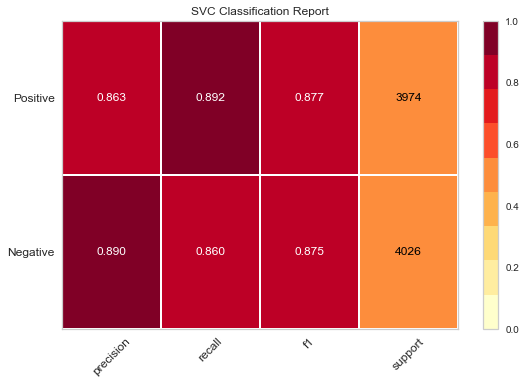

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [18]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(clf, classes=classes, support=True)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()   

In [12]:
# Save model
filename = 'review_classify_model.sav'
joblib.dump(clf, filename)

0.876


In [14]:
# load the model from disk
loaded_model = joblib.load('review_classify_model.sav')
result = loaded_model.score(X_test, y_test)
print(result)

0.876


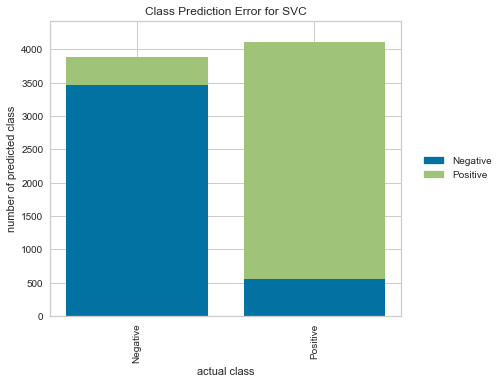

<AxesSubplot:title={'center':'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [17]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

classes = ['Negative', 'Positive']
visualizer = ClassPredictionError(loaded_model,classes=classes)
visualizer.fit(X=X_train, y=y_train)
visualizer.score(X=X_test, y=y_test)
visualizer.poof()

# Áp dụng model vừa train để phân loại thử một số bình luận

In [22]:
text =[["hôm nay trời đẹp lắm"]]
for i in text:
    test = tfidf_vect.transform(i)
    cmt = loaded_model.predict(test)
    if cmt == [0]:
        print("Bình luận tiêu cực")
    else: print("Bình luận tích cực")
    print(cmt)

Bình luận tích cực
[1]


# Train dữ liệu với model Logistic Regression để so sánh

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)
print("Accuracy: " + str(accuracy_score( y_test, y_pre)))
print('\n')
print("F1 Scores: ", f1_score(y_test, y_pre, average='weighted'))
print(classification_report(y_test,y_pre, target_names=list(encoder.classes_)))

Accuracy: 0.87425


F1 Scores:  0.8742484909966047
              precision    recall  f1-score   support

         neg       0.88      0.87      0.87      4026
         pos       0.87      0.88      0.87      3974

    accuracy                           0.87      8000
   macro avg       0.87      0.87      0.87      8000
weighted avg       0.87      0.87      0.87      8000



In [22]:
#Save LR model
filename2 = 'review_classify_LRmodel.sav'
joblib.dump(model, filename2)

['review_classify_LRmodel.sav']

In [8]:
# load the model from disk
loaded_model2 = joblib.load('review_classify_LRmodel.sav')
result2 = loaded_model2.score(X_test, y_test)
print(result2)

0.87425


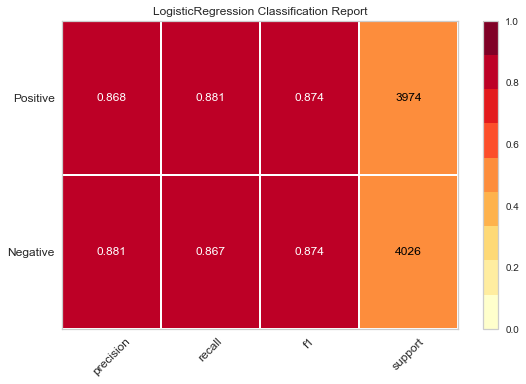

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [12]:
from yellowbrick.classifier import ClassificationReport

classes = ['Negative', 'Positive']
visualizer = ClassificationReport(model, classes=classes, support=True)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()   

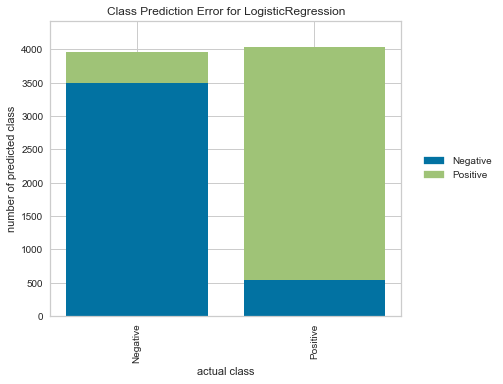

<AxesSubplot:title={'center':'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>

In [13]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(model,classes=classes)
visualizer.fit(X=X_train, y=y_train)
visualizer.score(X=X_test, y=y_test)
visualizer.poof()

# Áp dụng LR model vừa train để phân loại thử một số bình luận

In [15]:
text =[["quán này chật nhưng ăn ngon"]]
for i in text:
    test = tfidf_vect.transform(i)
    cmt = loaded_model2.predict(test)
    if cmt == [0]:
        print("Bình luận tiêu cực")
    else: print("Bình luận tích cực")
    print(loaded_model2.predict(test))

Bình luận tiêu cực
[0]
